# Visualize Cell Segementation On Top of DAPI/Boundary/RNA/Protein Images

This notebook read cell segmentation file (GeoJSON data) and map on different channels in dataset for one patch. 

Invalid geometries: 621    CR291333fcd-2316
Name: id, dtype: object
image size: (2391, 3415)
transcript range (in pixel): 27 3414 11 2390


Text(74.59722222222221, 0.5, '$Y (\\mu m)$')

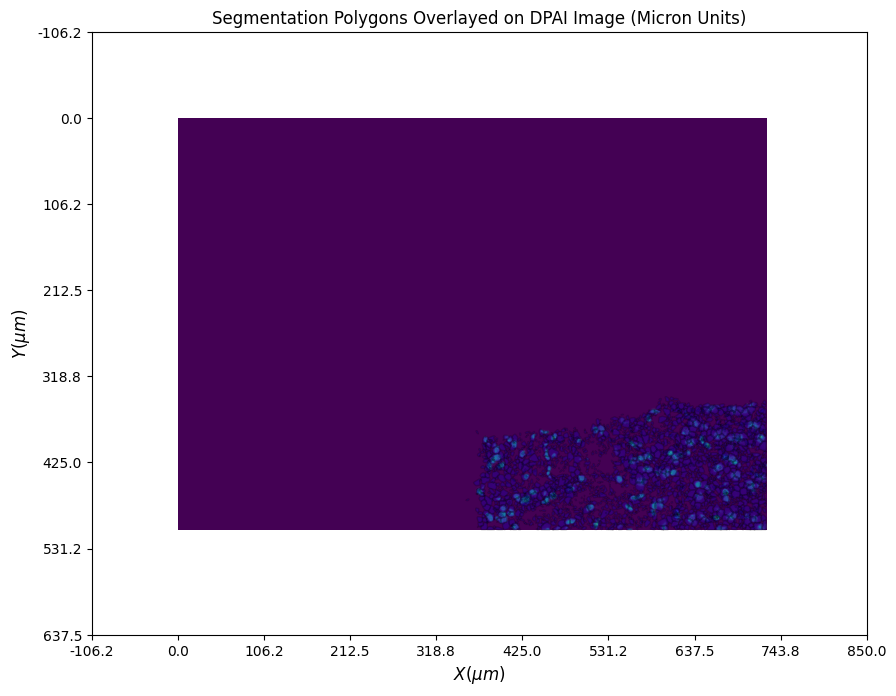

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import tifffile as tiff
from shapely import affinity
import os
import pandas as pd
import numpy as np

# Load original transcript data into a DataFrame
df = pd.read_parquet('D:/Upenn/BioSTATs9815/Project/aim2/transcripts_x0_y0.parquet')
x_min, x_max = df['x_pixel'].min(), df['x_pixel'].max()
y_min, y_max = df['y_pixel'].min(), df['y_pixel'].max()

# Set the GDAL configuration option to reject non-closed rings
os.environ['OGR_GEOMETRY_ACCEPT_UNCLOSED_RING'] = 'NO'

# Constants
PIXEL_TO_MICRON = 0.2125  # Microns per pixel
MICRON_TO_PIXEL = 1 / PIXEL_TO_MICRON

# Load GeoJSON data into a GeoDataFrame
gdf = gpd.read_file('D:/Upenn/BioSTATs9815/Project/baysor_example_output/x0_y0/segmentation_polygons_2d.json')

# Check for invalid geometries
invalid_geometries = gdf[~gdf.is_valid]
print("Invalid geometries:", invalid_geometries['id'])

# Ensure valid geometries and convert the coordinates in the GeoDataFrame to microns
gdf['geometry'] = gdf['geometry'].apply(lambda x: x if x.is_valid else x.buffer(0))
gdf['geometry'] = gdf['geometry'].apply(lambda geom: affinity.scale(geom, xfact=MICRON_TO_PIXEL, yfact=MICRON_TO_PIXEL, origin=(0, 0)))

# Load the corresponding image grid (TIFF image)
fullres_img_dapi = tiff.imread("D:/Upenn/BioSTATs9815/Project/morphology_patch/ch0_images_x0_y0.tif", is_ome=False, level=0)
print("image size:", fullres_img_dapi.shape)
print("transcript range (in pixel):", x_min, x_max, y_min, y_max)

# Plot the full resolution image first
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.imshow(fullres_img_dapi, cmap="viridis", origin='upper')  # Ensure correct orientation of the image

# Plot the polygons on top of the image with adjusted coordinates
gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.2, aspect='equal')  # Adjust alpha for transparency if needed

# Add a title and show the plot
ax.set_title("Segmentation Polygons Overlayed on DPAI Image (Micron Units)")

# Calculate micron tick positions and labels
xticks_pix = ax.get_xticks()
yticks_pix = ax.get_yticks()

xticks_micron = xticks_pix * PIXEL_TO_MICRON
yticks_micron = yticks_pix * PIXEL_TO_MICRON

ax.set_xticks(xticks_pix)
ax.set_yticks(yticks_pix)
ax.set_xticklabels(np.round(xticks_micron, 1))
ax.set_yticklabels(np.round(yticks_micron, 1))

# Set axis labels
ax.set_xlabel(r'$X (\mu m)$', fontsize=12)
ax.set_ylabel(r'$Y (\mu m)$', fontsize=12)

In [42]:
fullres_img_dapi = tiff.imread("D:/Upenn/BioSTATs9815/Project/ch2_images_x0_y0.tif", is_ome=False, level=0)

# Plot the full resolution image first
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.imshow(fullres_img_dapi, cmap="viridis", origin='upper')  # Ensure correct orientation of the image

# Plot the polygons on top of the image with adjusted coordinates
gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.2, aspect='equal')  # Adjust alpha for transparency if needed

# Add a title and show the plot
ax.set_title("Segmentation Polygons Overlayed on RNA Image (Micron Units)")

# Calculate micron tick positions and labels
xticks_pix = ax.get_xticks()
yticks_pix = ax.get_yticks()

xticks_micron = xticks_pix * PIXEL_TO_MICRON
yticks_micron = yticks_pix * PIXEL_TO_MICRON

ax.set_xticks(xticks_pix)
ax.set_yticks(yticks_pix)
ax.set_xticklabels(np.round(xticks_micron, 1))
ax.set_yticklabels(np.round(yticks_micron, 1))

# Set axis labels
ax.set_xlabel(r'$X (\mu m)$', fontsize=12)
ax.set_ylabel(r'$Y (\mu m)$', fontsize=12)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Upenn\\BioSTATs9815\\Project\\ch2_images_x0_y0.tif'

Text(82.04813749113566, 0.5, '$Y (\\mu m)$')

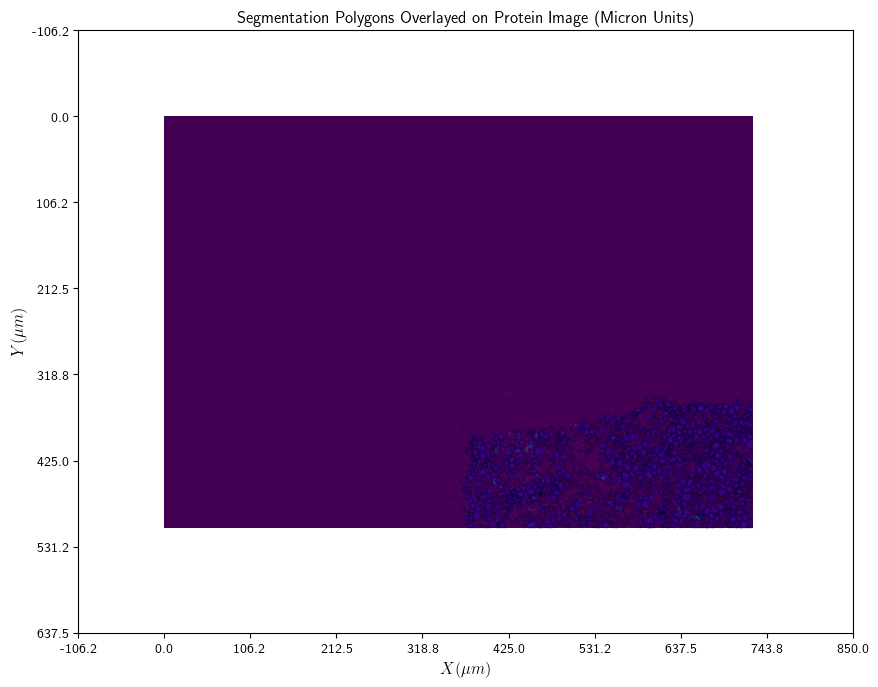

In [ ]:
fullres_img_dapi = tiff.imread("D:/Upenn/BioSTATs9815/Project/ch3_images_x0_y0.tif", is_ome=False, level=0)

# Plot the full resolution image first
fig, ax = plt.subplots(figsize=(10, 10)) 
ax.imshow(fullres_img_dapi, cmap="viridis", origin='upper')  # Ensure correct orientation of the image

# Plot the polygons on top of the image with adjusted coordinates
gdf.plot(ax=ax, color='blue', edgecolor='black', alpha=0.2, aspect='equal')  # Adjust alpha for transparency if needed

# Add a title and show the plot
ax.set_title("Segmentation Polygons Overlayed on Protein Image (Micron Units)")

# Calculate micron tick positions and labels
xticks_pix = ax.get_xticks()
yticks_pix = ax.get_yticks()

xticks_micron = xticks_pix * PIXEL_TO_MICRON
yticks_micron = yticks_pix * PIXEL_TO_MICRON

ax.set_xticks(xticks_pix)
ax.set_yticks(yticks_pix)
ax.set_xticklabels(np.round(xticks_micron, 1))
ax.set_yticklabels(np.round(yticks_micron, 1))

# Set axis labels
ax.set_xlabel(r'$X (\mu m)$', fontsize=12)
ax.set_ylabel(r'$Y (\mu m)$', fontsize=12)

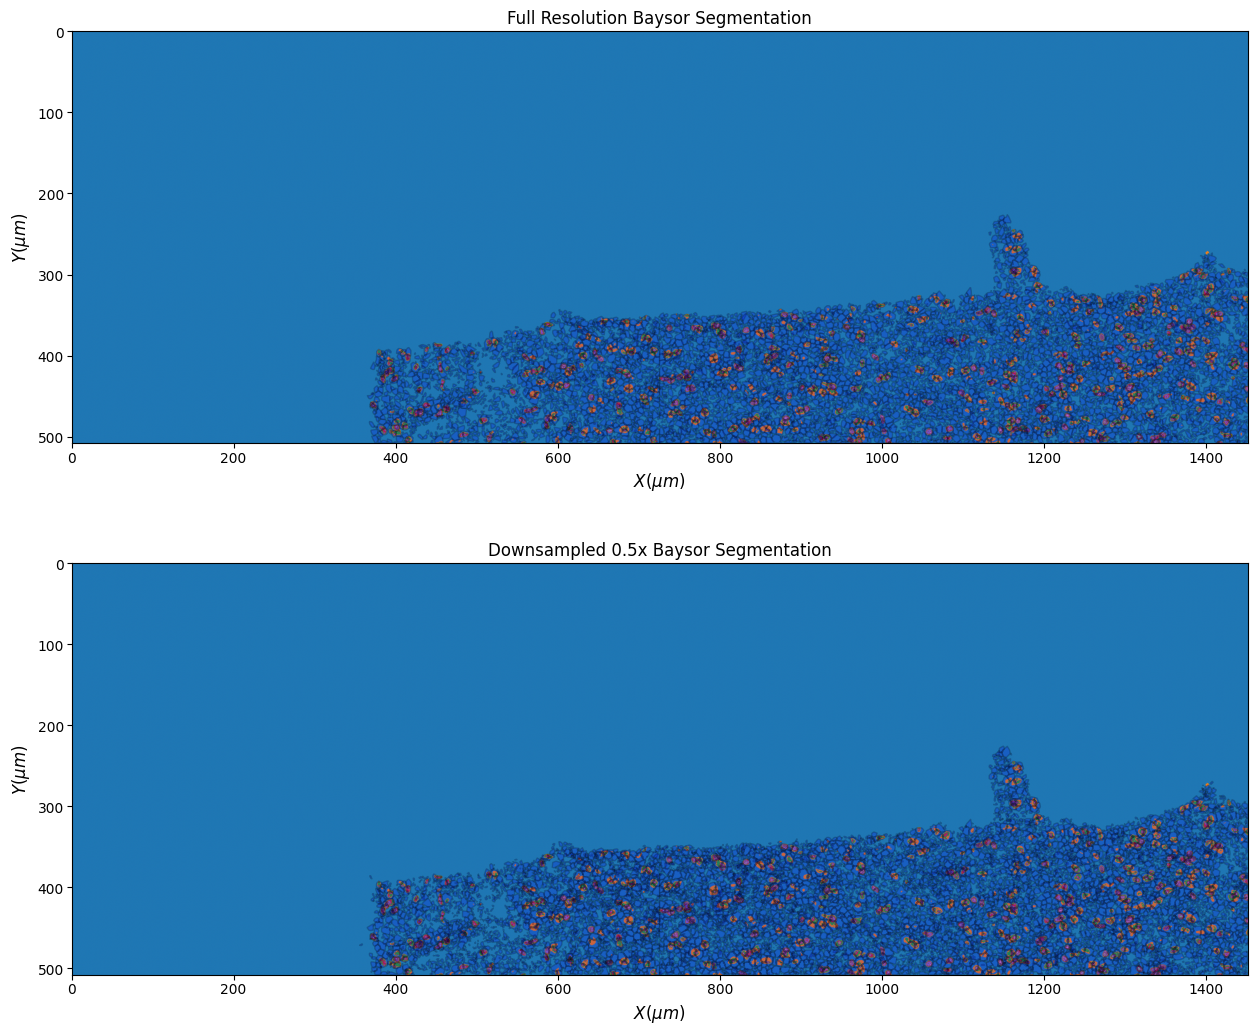

In [53]:
# Read images
fullres_img_dapi_00 = tiff.imread("D:/Upenn/BioSTATs9815/Project/morphology_patch/ch0_images_x0_y0.tif", is_ome=False, level=0)
fullres_img_dapi_10 = tiff.imread("D:/Upenn/BioSTATs9815/Project/morphology_patch/ch0_images_x1_y0.tif", is_ome=False, level=0)
h, w = fullres_img_dapi_00.shape

# Constants
PIXEL_TO_MICRON = 0.2125  # Microns per pixel
MICRON_TO_PIXEL = 1 / PIXEL_TO_MICRON

# Load GeoJSON data into a GeoDataFrame downsampling
gdf_00 = gpd.read_file('D:/Upenn/BioSTATs9815/Project/baysor_example_output/downsample0.5_x0_y0/segmentation_polygons_2d.json')
gdf_10 = gpd.read_file('D:/Upenn/BioSTATs9815/Project/baysor_example_output/downsample0.5_x1_y0/segmentation_polygons_2d.json')

gdf_list = [gdf_00, gdf_10]
# Ensure valid geometries and convert the coordinates in the GeoDataFrame to microns
for gdf in gdf_list:
    gdf['geometry'] = gdf['geometry'].apply(lambda x: x if x.is_valid else x.buffer(0))
#    gdf['geometry'] = gdf['geometry'].apply(lambda geom: affinity.scale(geom, xfact=MICRON_TO_PIXEL, yfact=MICRON_TO_PIXEL, origin=(0, 0)))

# align patches
stitched_image = np.concatenate([fullres_img_dapi_00, fullres_img_dapi_10], axis=1)
gdf_all_full = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

# Load GeoJSON data into a GeoDataFrame fullresolution
gdf_00 = gpd.read_file('D:/Upenn/BioSTATs9815/Project/baysor_example_output/x0_y0/segmentation_polygons_2d.json')
gdf_10 = gpd.read_file('D:/Upenn/BioSTATs9815/Project/baysor_example_output/x1_y0/segmentation_polygons_2d.json')

gdf_list = [gdf_00, gdf_10]
# Ensure valid geometries and convert the coordinates in the GeoDataFrame to microns
for gdf in gdf_list:
    gdf['geometry'] = gdf['geometry'].apply(lambda x: x if x.is_valid else x.buffer(0))
#    gdf['geometry'] = gdf['geometry'].apply(lambda geom: affinity.scale(geom, xfact=MICRON_TO_PIXEL, yfact=MICRON_TO_PIXEL, origin=(0, 0)))

gdf_all_half = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))
fig, axs = plt.subplots(nrows=2, figsize=(12, 24))  

img_h, img_w = stitched_image.shape[:2]

# ----- subplot1：Full resolution -----
axs[0].imshow(
    stitched_image,
    cmap="tab10",
    extent=[0, img_w * PIXEL_TO_MICRON, img_h * PIXEL_TO_MICRON, 0],  
    aspect='auto'
)
gdf_all_full.plot(ax=axs[0], color='blue', edgecolor='black', alpha=0.2)
axs[0].set_title("Full Resolution Baysor Segmentation")

axs[0].set_xlabel(r'$X (\mu m)$', fontsize=12)
axs[0].set_ylabel(r'$Y (\mu m)$', fontsize=12)

# ----- subplot2：Half resolution -----
axs[1].imshow(
    stitched_image,
    cmap="tab10",
    extent=[0, img_w * PIXEL_TO_MICRON, img_h * PIXEL_TO_MICRON, 0],
    aspect='auto'
)
gdf_all_half.plot(ax=axs[1], color='blue', edgecolor='black', alpha=0.2)
axs[1].set_title("Downsampled 0.5x Baysor Segmentation")

axs[1].set_xlabel(r'$X (\mu m)$', fontsize=12)
axs[1].set_ylabel(r'$Y (\mu m)$', fontsize=12)

for ax in axs:
    ax.set_xlim(0, img_w * PIXEL_TO_MICRON)
    ax.set_ylim(img_h * PIXEL_TO_MICRON, 0)
    ax.set_aspect('equal') 
    ax.margins(0)
    ax.tick_params(pad=2)

plt.tight_layout(pad=0)
plt.subplots_adjust(left=0.01, right=0.99, top=0.98, bottom=0.02, hspace=-0.7)
plt.show()
